In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Bidirectional, Dense, Dropout, LSTM, GRU, Conv2D, Flatten, MaxPooling2D, Activation
from keras.utils import np_utils
from PIL import Image
import numpy as np
import os
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
#
# mount google drive
#
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/drive')
#/content/drive/MyDrive/img
#os.listdir()
print(os.getcwd())
os.chdir('drive/My Drive/Colab Notebooks/IoT/CNN/data')
print(os.listdir())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
['img', 'log', 'gesture_model.h5']


In [3]:
epoch = 20  # epoch数
# データの作成
# データ用の変数
input_data = []
label_data = []
id = 0
data_dir = './img'#dataフォルダの下にデータがある
for c in sorted(os.listdir(data_dir)):#フォルダを取り出す
  print(f'folder: {c}, label: {id}')#フォルダごとにラベルを付ける
  d = os.path.join(data_dir, c)
  files = os.listdir(d)
  for i in [ft for ft in files if ('png' in ft)]:#txtファイルのみ取り出す
    image = Image.open(os.path.join(d, i))
    image = image.convert("RGB")
    image = image.resize((100, 100))
    temp = np.asarray(image)
    input_data.append(temp)
    label_data.append(id)
  id += 1

input_data = np.array(input_data)
label_data = np.array(label_data)
input_data = input_data.astype('float32')/255
train_data = np.array(input_data, dtype=np.float32)#学習データ（入力）
train_label = np_utils.to_categorical(label_data.astype('int32'), 4)

folder: b, label: 0
folder: c, label: 1
folder: g, label: 2
folder: p, label: 3


In [4]:
x_train, x_test, y_train, y_test = train_test_split(input_data, label_data, test_size=0.20)
train_data.shape[1:]

(100, 100, 3)

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

In [6]:
#    model = keras.models.load_model(os.path.join('result', 'RNNmodel'))  # modelのロード
#モデルの設定
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

0


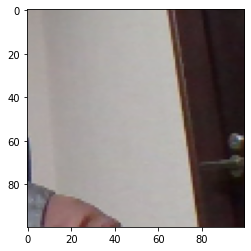

In [7]:
plt.imshow(x_train[200])
print(y_train[200])

In [8]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
16/16 [==============================] - 25s 1s/step - loss: 1.9614 - accuracy: 0.4029
Epoch 2/15
16/16 [==============================] - 24s 1s/step - loss: 0.7062 - accuracy: 0.7607
Epoch 3/15
16/16 [==============================] - 23s 1s/step - loss: 0.1292 - accuracy: 0.9611
Epoch 4/15
16/16 [==============================] - 23s 1s/step - loss: 0.0079 - accuracy: 0.9980
Epoch 5/15
16/16 [==============================] - 24s 1s/step - loss: 0.0012 - accuracy: 1.0000
Epoch 6/15
16/16 [==============================] - 23s 1s/step - loss: 0.0598 - accuracy: 0.9734
Epoch 7/15
16/16 [==============================] - 23s 1s/step - loss: 0.0836 - accuracy: 0.9775
Epoch 8/15
16/16 [==============================] - 23s 1s/step - loss: 0.0045 - accuracy: 1.0000
Epoch 9/15
16/16 [==============================] - 23s 1s/step - loss: 0.0012 - accuracy: 1.0000
Epoch 10/15
16/16 [==============================] - 23s 1s/step - loss: 6.0289e-04 - accuracy: 1.0000
Epoch 11/15
16/

In [9]:
model.save('gesture_model.h5')

In [ ]:
# モデルの保存
model.save(os.path.join('result', 'RNNmodel'))


INFO:tensorflow:Assets written to: result/RNNmodel/assets


INFO:tensorflow:Assets written to: result/RNNmodel/assets
